<a href="https://colab.research.google.com/github/matusoff/ML_models/blob/main/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:1% !important:height:1% !important;}</style>"
HTML(style)

In [ ]:
# Predict survived Titanic passengers with the Decision Trees Model 

In [5]:
titanic_data = pd.read_csv('/content/sample_data/train.csv')

In [6]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Choosing a variable for training DTs model 
#In this case we will drop the variables which we will NOT use in our model
#axis=1 means it's names of the columns but not rows

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
#Convert variables into dummy/indicator variables
X = pd.get_dummies(X)

In [12]:
'''For linear regression it does matter if you have cross-correlated columns like  
Sex_female and Sex_male. For DecisionTrees model doesn't, so we will keep it.
'''
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [13]:
# Fill the NaN values for the Age column with the median value

X.Age.median()

28.0

In [14]:
X = X.fillna({'Age': X.Age.median()})

In [15]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [17]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

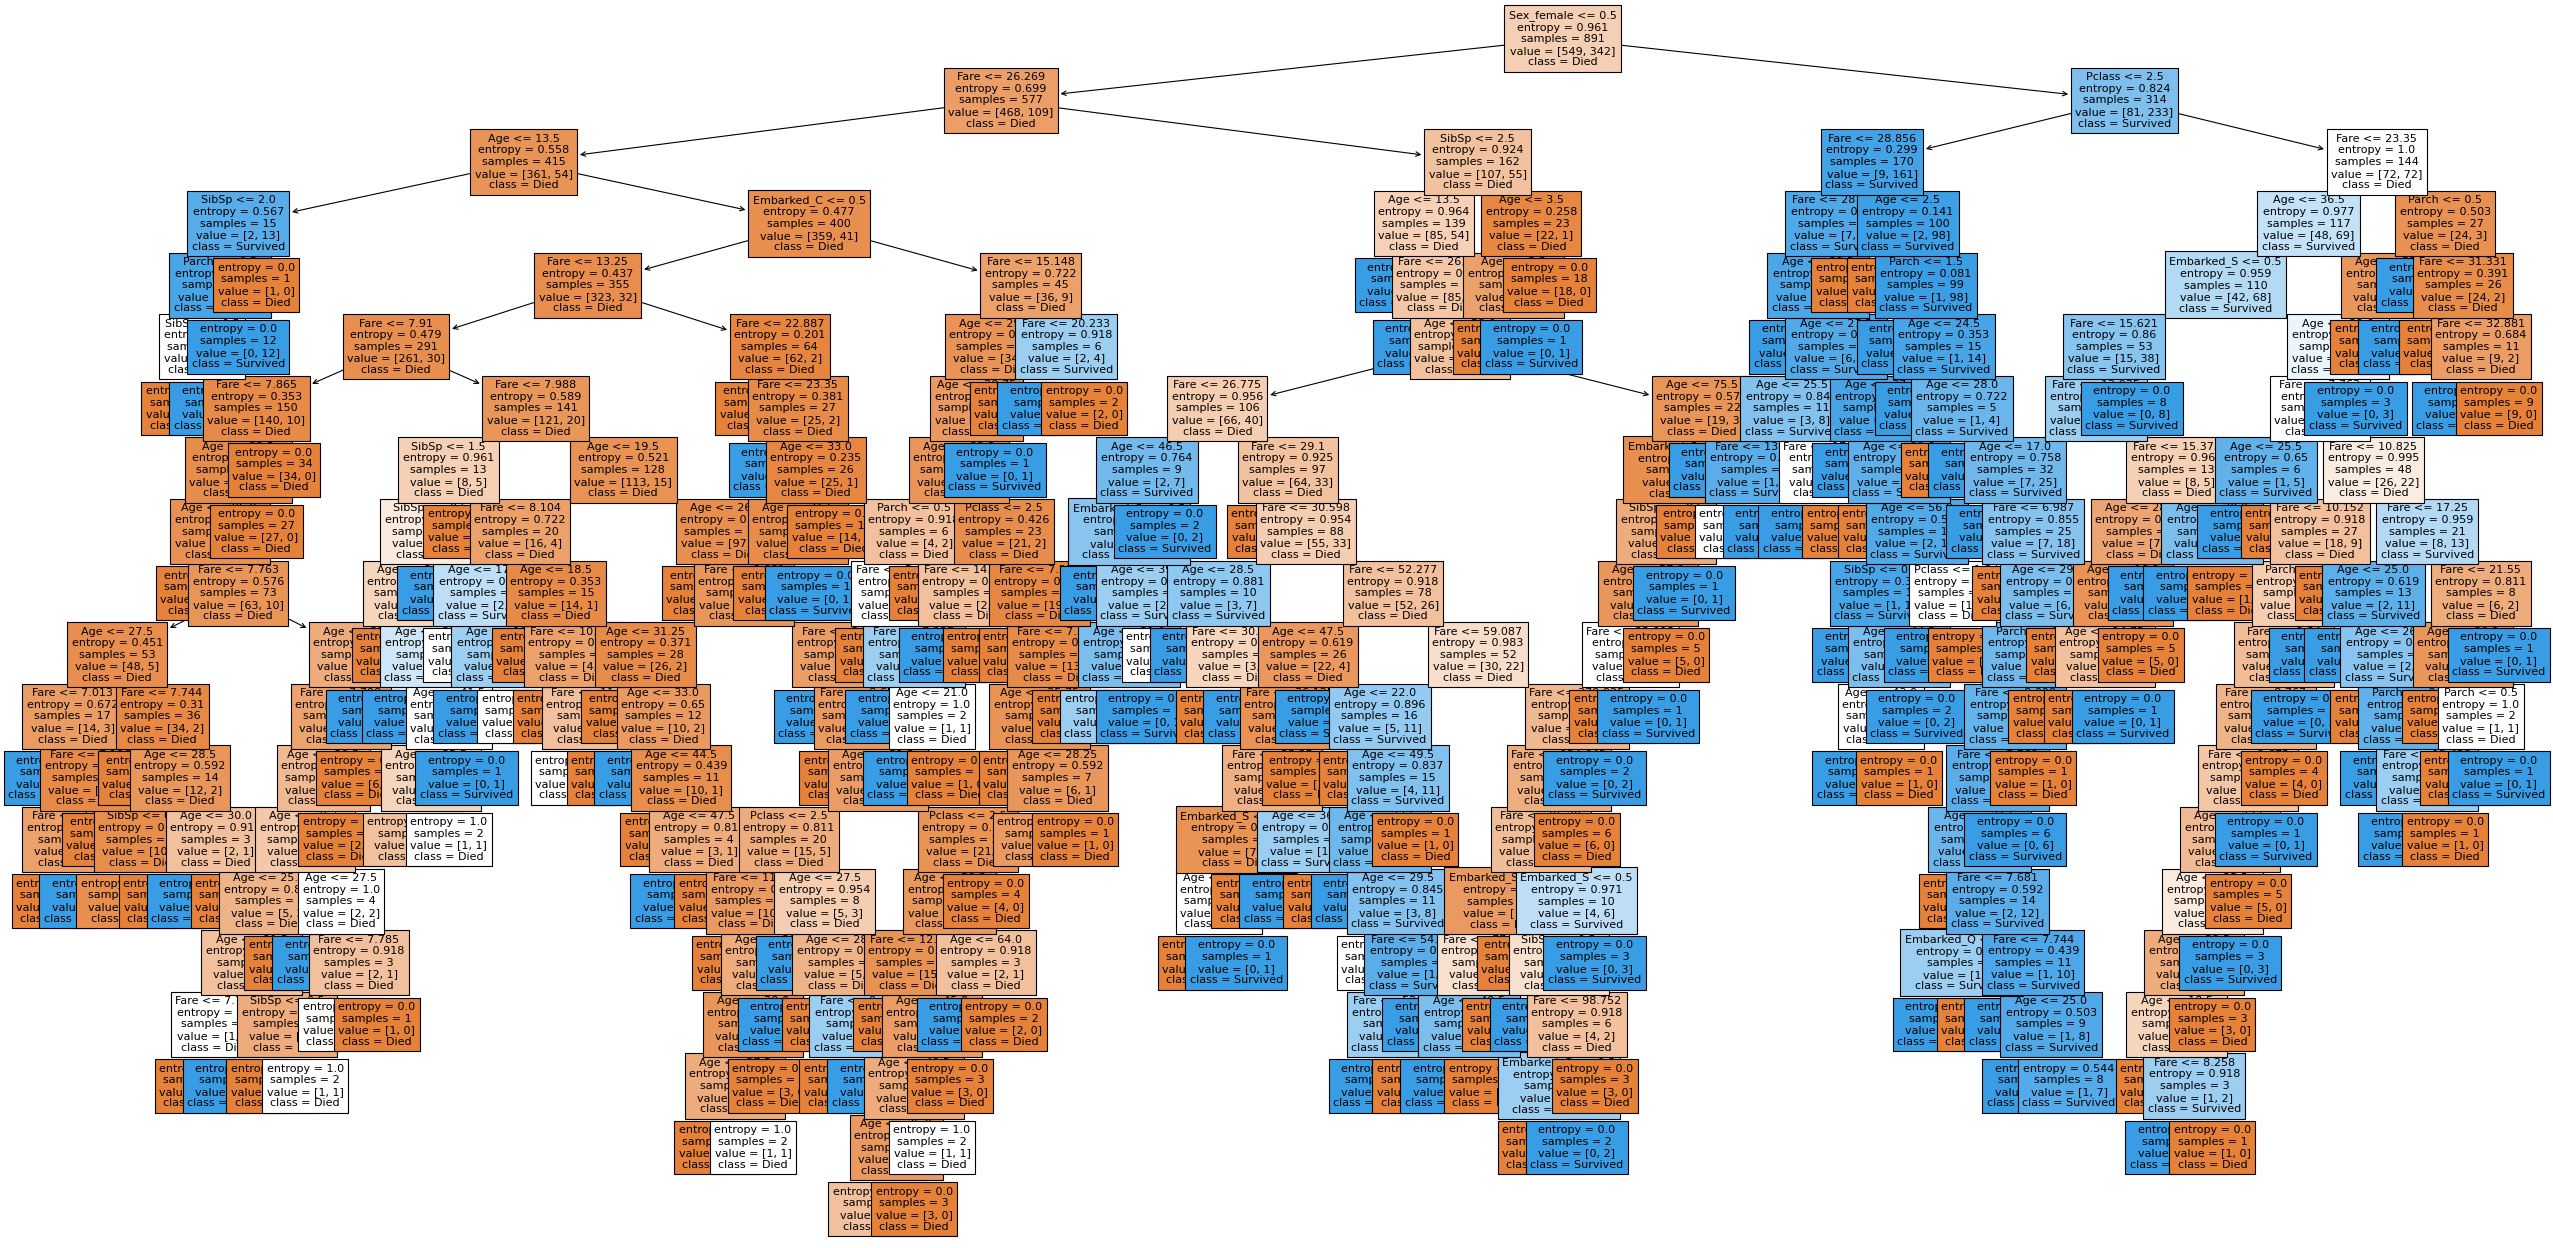

In [18]:
#Over trained model

# graph = Source(tree.export_graphviz(clf, out_file=None,
#                                     feature_names=list(X),
#                                     class_names=['Died', 'Survived'],
#                                     filled = True))
# display(SVG(graph.pipe(format='svg')))

plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=10,
                   filled=True,
                   feature_names=list(X), 
                   class_names=['Died', 'Survived'])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# X_train.shape

(596, 10)

In [ ]:
# X_test.shape

(295, 10)

In [21]:
clf.score(X, y)

0.9797979797979798

In [22]:
clf.score(X_train, y_train)

0.9714765100671141

In [23]:
clf.score(X_test, y_test)

0.9966101694915255

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

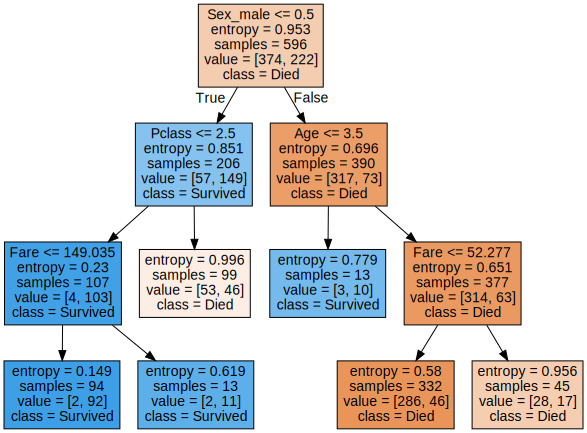

In [26]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Died', 'Survived'],
                                    filled = True))
display(SVG(graph.pipe(format='svg')))

In [27]:
clf.score(X_train, y_train)

0.8053691275167785

In [28]:
clf.score(X_test, y_test)

0.7762711864406779

In [29]:
# Analyze clf.score depending on max_depth
max_depth_values = range(1, 100)

In [30]:
#Adding data to DataFrame from the "for ciicle" below
score_data = pd.DataFrame()

In [31]:
score_data_list = []

for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)
  mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

  temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                  'train_score': [train_score], 
                                  'test_score': [test_score],
                                  'cross_val_score': [mean_cross_val_score]})

  score_data_list.append(temp_score_data)
  score_data = pd.concat(score_data_list, ignore_index=True)
  #score_data = score_data.append(temp_score_data)

In [32]:
score_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
1,2,0.805369,0.776271,0.770196
2,3,0.823826,0.820339,0.790322
3,4,0.833893,0.823729,0.788627
4,5,0.840604,0.806780,0.795350


In [33]:
score_data_long = pd.melt(score_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [34]:
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<Axes: xlabel='max_depth', ylabel='score'>

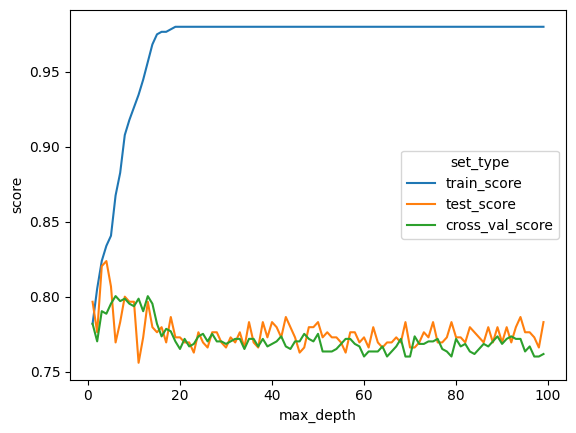

In [35]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=score_data_long)

In [36]:
score_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.800392
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.793627


In [37]:
#Cross-Validation method
from sklearn.model_selection import cross_val_score

In [38]:
#based on cross_val_score we found that the max score is at the 10th validation 
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [39]:
#let's test now this best_clf on the test data
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.7864406779661017

In [40]:
'''we split our train data on 5 equal parts and train model 
on each different combinations of splitted datasets to get the best prediction

'''  
cross_val_score(clf, X_train, y_train, cv=5)

array([0.74166667, 0.78991597, 0.74789916, 0.80672269, 0.74789916])

In [41]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7684873949579831

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Model
model = DecisionTreeClassifier()

# Parameters
param_grid = {
    'max_depth': range(1, 15),
    'min_samples_split': range(2, 300, 5),
    'min_samples_leaf': range(2, 300, 10)

}

# Create object  GridSearchCV
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Train model 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(2, 300, 10),
                         'min_samples_split': range(2, 300, 5)},
             scoring='accuracy')

In [43]:
print("best paramenters:", grid_search.best_params_)
print("Quality of the model:", grid_search.best_score_)

best paramenters: {'max_depth': 7, 'min_samples_leaf': 12, 'min_samples_split': 37}
Quality of the model: 0.8154901960784313


In [44]:
# Results of griding the parameters
results = grid_search.cv_results_

# Extract paramenters
params = results['params']

# Create a list of parameeters for each set 
max_depths = grid_search.best_params_['max_depth']
min_samples_split = grid_search.best_params_['min_samples_split']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']

# Learn the classifier using best parameters
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depths, \
                                min_samples_split=min_samples_split, \
                                min_samples_leaf=min_samples_leaf)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=12,
                       min_samples_split=37)

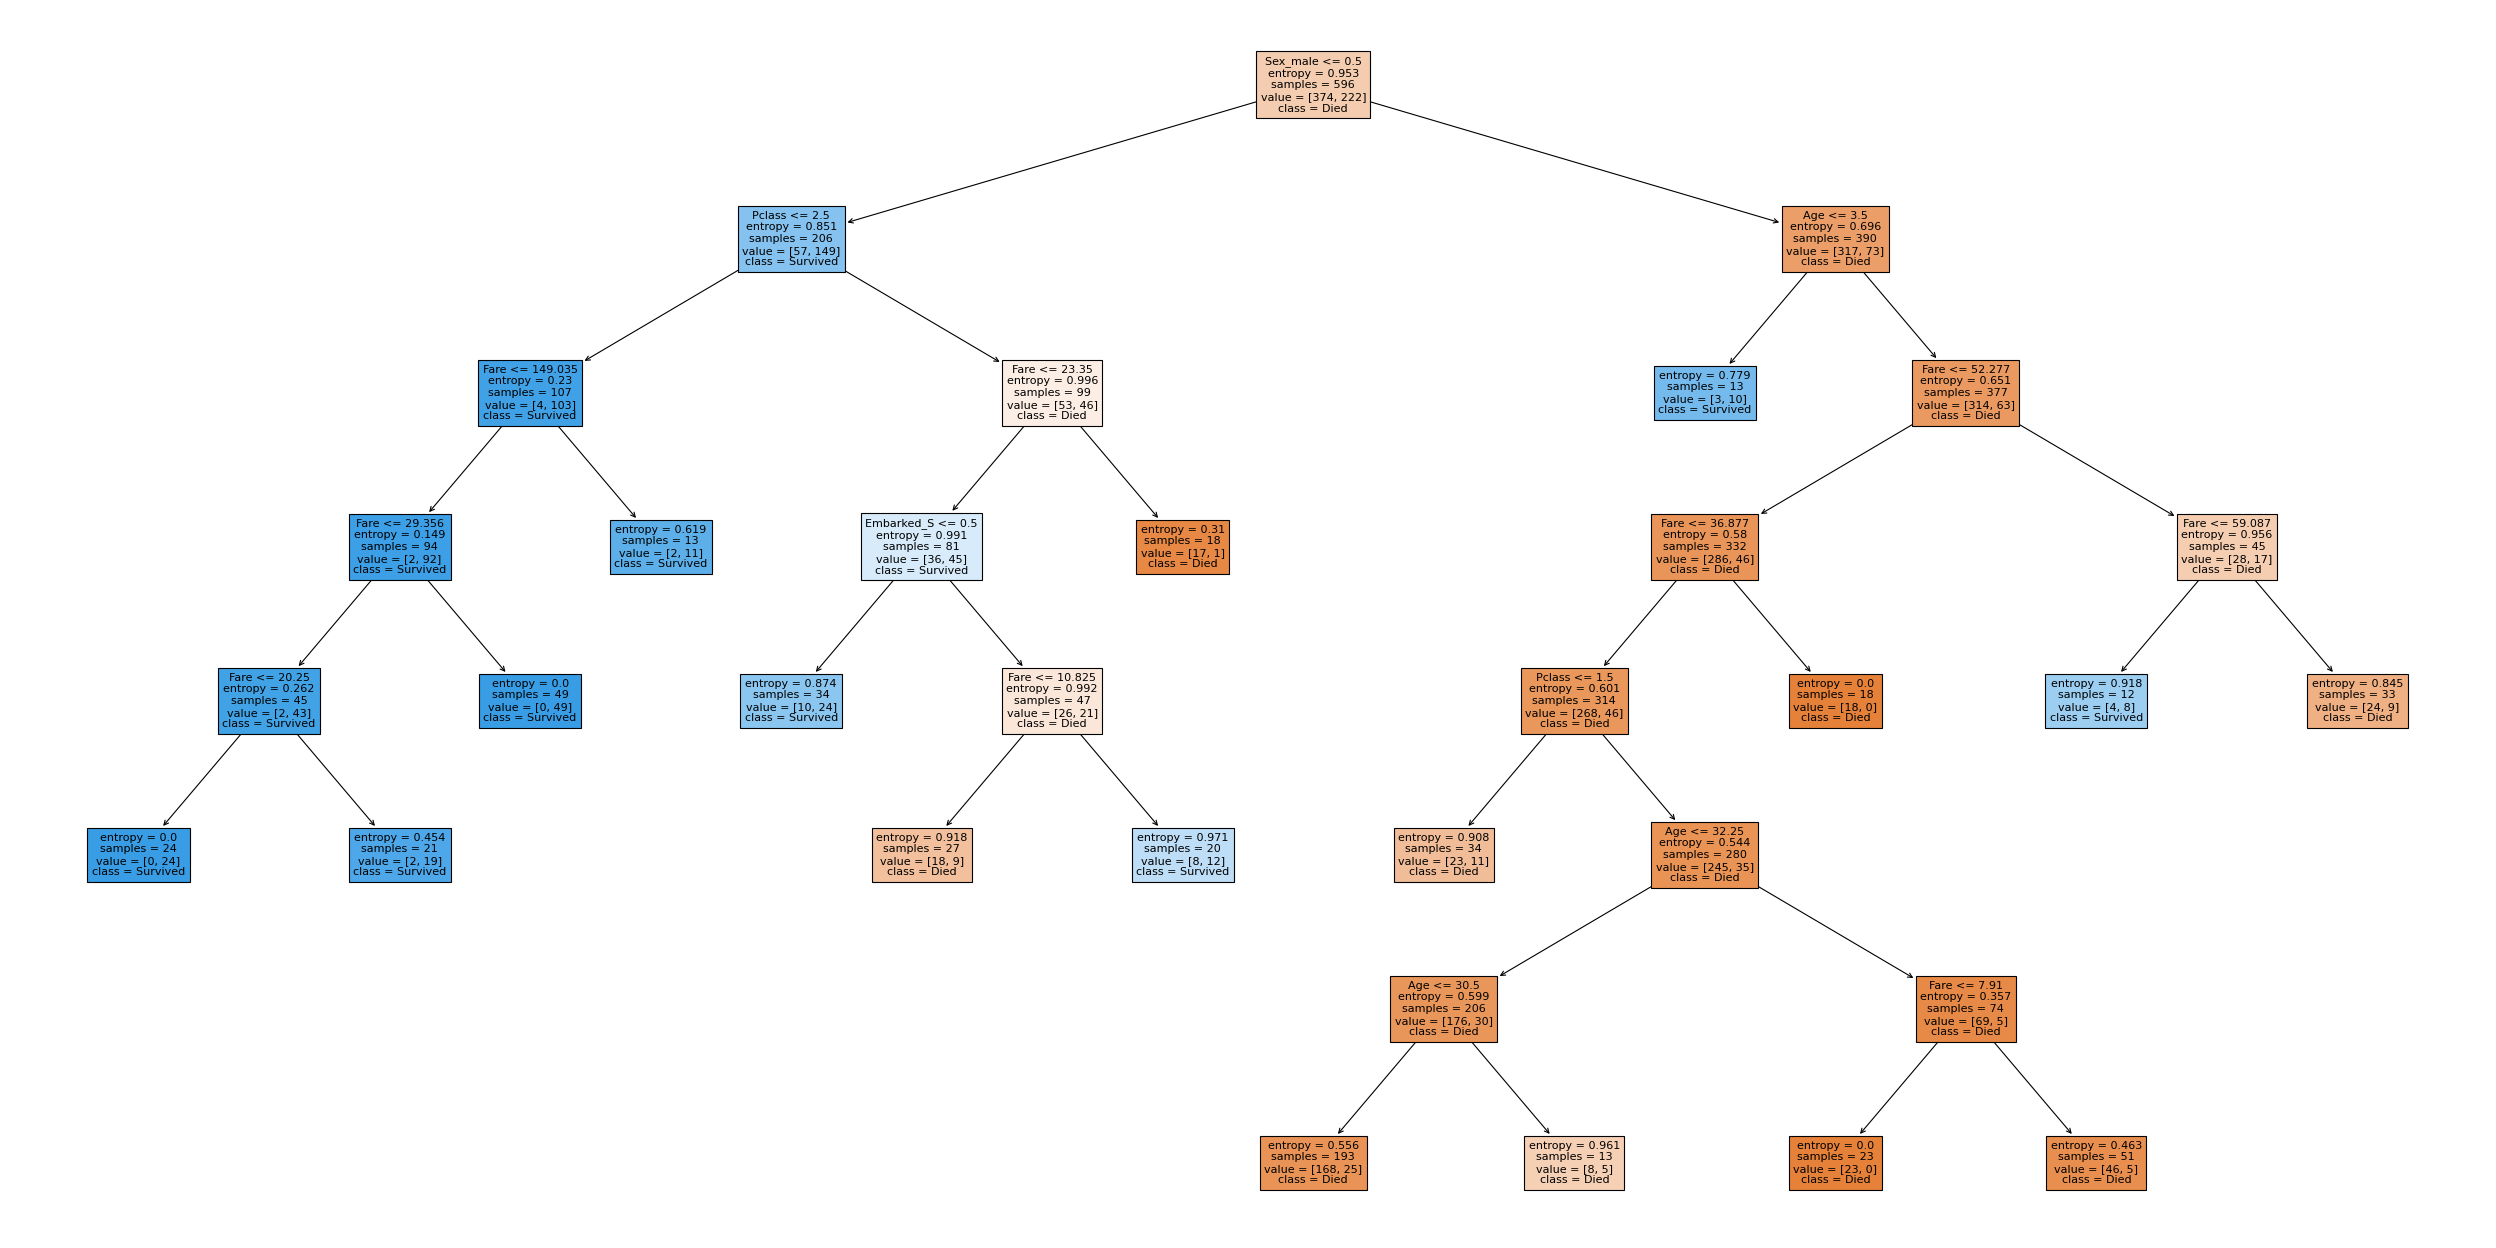

In [45]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=10,
                   filled=True,
                   feature_names=list(X), 
                   class_names=['Died', 'Survived'])

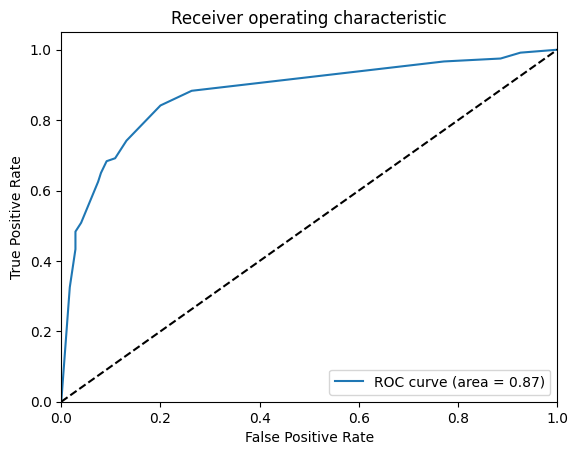

In [46]:
# Build ROC-curve
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_pred = clf.predict(X_test)
y_predicted_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [47]:
# precision and recall of the model
from sklearn.metrics import precision_score, recall_score

y_pred = np.where(y_predicted_prob[:, 1] > 0.5, 1, 0)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8367346938775511
0.6833333333333333


In [48]:
clf.score(X_test, y_test)

0.8169491525423729